In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import torch
from d2l import torch as d2l

device = torch.device('mps')

In [2]:
# 生成数据
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features[:5, :]

tensor([[ 1.4261, -0.4517],
        [-1.5526, -1.6572],
        [ 0.5019,  0.8505],
        [ 1.3927, -3.5441],
        [-1.0874, -0.5124]])

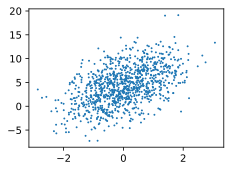

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1)

In [4]:
# 数据迭代
def data_iter(batch_size, features, labels):
    num_examples = features.shape[0]
    # 随机读取数据
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i : min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
    
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.3284,  0.3565],
        [-0.4698,  1.3282],
        [-0.9421,  0.5923],
        [ 0.9588,  0.2657],
        [-0.3126, -0.1847],
        [-1.6092, -0.7872],
        [ 0.6510, -0.1007],
        [-0.7513, -0.8825],
        [ 1.0861, -1.4516],
        [ 1.3333, -0.8855]]) 
 tensor([[ 3.6455],
        [-1.2555],
        [ 0.2971],
        [ 5.2168],
        [ 4.2039],
        [ 3.6624],
        [ 5.8278],
        [ 5.6935],
        [11.3127],
        [ 9.8748]])


In [5]:
# 初始化 w, b
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
# 定义模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [7]:
# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [8]:
# 定义优化算法
def sgd(params, lr, batch_size):
    # 小批量随机梯度下降
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'第 {epoch+1} 次迭代, 损失函数为 {train_l.sum():.5f}')

第 1 次迭代, 损失函数为 33.58451
第 2 次迭代, 损失函数为 0.12063
第 3 次迭代, 损失函数为 0.04904
第 4 次迭代, 损失函数为 0.04886
第 5 次迭代, 损失函数为 0.04904
第 6 次迭代, 损失函数为 0.04894
第 7 次迭代, 损失函数为 0.04890
第 8 次迭代, 损失函数为 0.04891
第 9 次迭代, 损失函数为 0.04885
第 10 次迭代, 损失函数为 0.04890


In [10]:
print(f'w的估计误差为: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差为: {true_b - b}')

w的估计误差为: tensor([-2.5845e-04, -6.1035e-05], grad_fn=<SubBackward0>)
b的估计误差为: tensor([0.0002], grad_fn=<RsubBackward1>)
